<a href="https://colab.research.google.com/github/mariusblarsen/ae-attack-pipeline/blob/SAA-attack/SAA_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. Generate adversarial example

## Sparse-Adversarial-Attack

In [1]:
!git clone https://github.com/mariusblarsen/ae-attack-pipeline

Cloning into 'ae-attack-pipeline'...
remote: Enumerating objects: 1521, done.
remote: Counting objects: 100% (1521/1521), done.
remote: Compressing objects: 100% (978/978), done.
remote: Total 1521 (delta 542), reused 1494 (delta 521), pack-reused 0
Receiving objects: 100% (1521/1521), 16.08 MiB | 23.66 MiB/s, done.
Resolving deltas: 100% (542/542), done.


In [2]:
%cd ae-attack-pipeline

/content/ae-attack-pipeline


In [14]:
!git pull origin SAA-attack

remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 3), reused 1 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/mariusblarsen/ae-attack-pipeline
 * branch            SAA-attack -> FETCH_HEAD
   2577729..fe3b25d  SAA-attack -> origin/SAA-attack
Updating 2577729..fe3b25d
Fast-forward
 Tianchi04/attack_3.py | 10 ++++++----
 1 file changed, 6 insertions(+), 4 deletions(-)


In [4]:
!git checkout -b SAA-attack

Switched to a new branch 'SAA-attack'


In [ ]:
!pip install -r Tianchi04/requirements.txt

### Fetch checkpoints folder from gdrive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%cd /content
!ls

/content
ae-attack-pipeline  drive  sample_data


In [8]:
# Replace path to where the checkpoint files folder is
%cd drive/MyDrive/Studie/Prosjekttoppgave/

/content/drive/MyDrive/Studie/Prosjekttoppgave


In [9]:
%cp -av Colab\ assets checkpoints

'Colab assets' -> 'checkpoints'
'Colab assets/yolov4.cfg' -> 'checkpoints/yolov4.cfg'
'Colab assets/yolov4.weights' -> 'checkpoints/yolov4.weights'
'Colab assets/yolov4.pth' -> 'checkpoints/yolov4.pth'
'Colab assets/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth' -> 'checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'


In [10]:
%mv checkpoints ../../../../ae-attack-pipeline/Tianchi04/

In [11]:
%cd ../../../../ae-attack-pipeline/Tianchi04/
!ls checkpoints

/content/ae-attack-pipeline/Tianchi04
faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth  yolov4.pth
yolov4.cfg					   yolov4.weights


In [51]:
# Run when eval.py gets following error:
#   IsADirectoryError: [Errno 21] Is a directory: './select1000_new/.ipynb_checkpoints'
!rm -rf ./select1000_new_p/.ipynb_checkpoints/

In [52]:
!python eval.py

100% 3/3 [00:02<00:00,  1.28it/s]
convolution havn't activate linear
convolution havn't activate linear
convolution havn't activate linear
  0% 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
For image: 1.jpg
NUMBER OF BOXES FOUND: 4
NUMBER OF ADV BOXES FOUND: 2
 33% 1/3 [00:00<00:01,  1.86it/s]For image: 2.png
NUMBER OF BOXES FOUND: 2
NUMBER OF ADV BOXES FOUND: 1
 67% 2/3 [00:01<00:00,  1.94it/s]For image: 3.jpeg
NUMBER OF BOXES FOUND: 9
NUMBER OF ADV BOXES FOUND: 6
100% 3/3 [00:01<00:00,  1.97it/s]
Overall score:  0.8076
Saving into whitebox_yolo_overall_score.json...
/usr/local/lib/python3.7/dist-packages/mmdet/co

In [64]:
!rm -rf ../images/.ipynb_checkpoints/

In [81]:
!python attack_3.py --max_iter=250

/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '
Use load_from_local loader
file: 2.png, pixels: 2483
/usr/local/lib/python3.7/dist-packages/mmdet/apis/inference.py:73: UserWarning: `LoadImage` is deprecated and will be removed in future releases. You may use `LoadImageFromWebcam` from `mmdet.datasets.pipelines.` instead.
  warnings.warn('`LoadImage` is deprecated and will be removed in '
libpng warning: iCCP: known incorrect sRGB profile
/usr/local/lib/python3.7/dist-packages/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
libpng warning: iCCP: known incorrect sRGB profile
/usr/l

# MMDet test

In [ ]:
!ls

assets	     checkpoints   improve_2.py  models.py    README.md		tool
attack_1.py  eval.py	   improve_3.py  output_data  requirements.txt	utils
attack_2.py  final	   infer.py	 pixel.json   select1000_new
attack_3.py  improve_1.py  mmdetection	 __pycache__  select1000_new_p


/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '


Use load_from_local loader


/usr/local/lib/python3.7/dist-packages/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


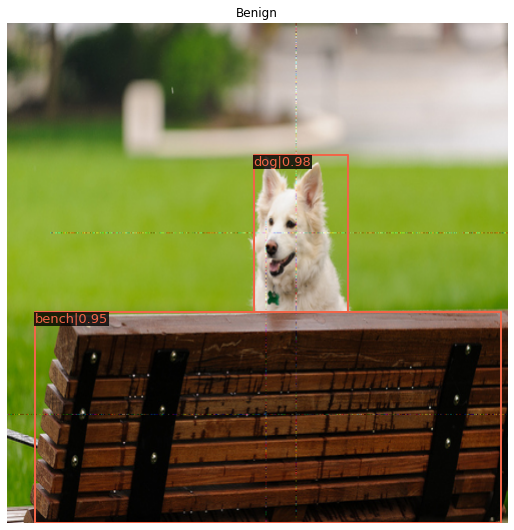

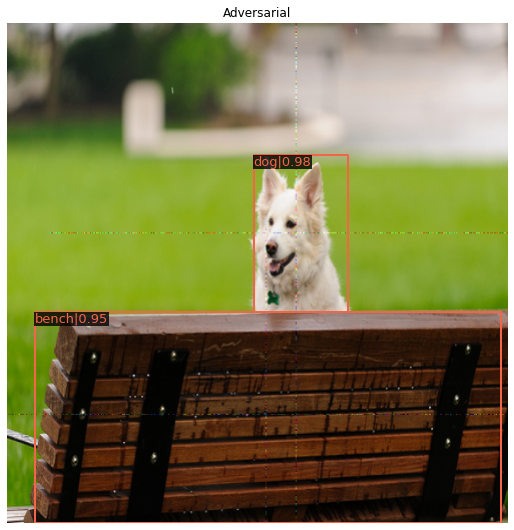

In [82]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot
import os
import mmcv
import numpy as np

images = os.listdir('select1000_new/')
images = ['final/2.png']
if '.ipynb_checkpoints' in images:
  # Removing common error
  images.remove('.ipynb_checkpoints')

# Choose to use a config and initialize the detector
config = './mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
# Setup a checkpoint file to load
checkpoint = './checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'
# initialize the detector
model = init_detector(config, checkpoint, device='cuda:0')

for image in images:
  # Use the detector to do inference
  img0 = 'select1000_new/'+image     # Benig n
  img1 = 'select1000_new_p/'+image   # Adversarial
  img0 = image     # Benig n
  img1 = image   # Adversarial
  result0 = inference_detector(model, img0)
  result1 = inference_detector(model, img1)

  show_result_pyplot(model, img0, result0, score_thr=0.5, title="Benign")
  show_result_pyplot(model, img1, result1, score_thr=0.5, title="Adversarial")

# YOLOv4 test

In [ ]:
from tool.torch_utils import do_detect
from models import Yolov4

cfgfile = "checkpoints/yolov4.cfg"
weightfile = "checkpoints/yolov4.weights"
darknet_model = Darknet(cfgfile)
darknet_model.load_weights(weightfile)
darknet_model = darknet_model.eval().cuda()

resize_small = transforms.Compose([
            transforms.Resize((608, 608)),
        ])

img0 = resize_small(img0)

model = Yolov4(yolov4conv137weight=None, n_classes=80, inference=True)
boxes = do_detect(model, sized, 0.4, 0.6, use_cuda)

show_result_pyplot(model, img, result, score_thr=0.3)